# Internal Tide and BALanced Turbulence configuration (ITBALT), overview

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import xarray as xr

import crocosi.postp as pp

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/distributed/utils.py:137: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


In [2]:
from dask.distributed import Client, LocalCluster
#
#cluster = LocalCluster()
#
from dask_jobqueue import PBSCluster
cluster = PBSCluster()
w = cluster.scale(28*2)
#
client = Client(cluster)
client

Client Scheduler: tcp://10.148.1.47:57915 Dashboard: http://10.148.1.47:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


## Load data

In [3]:
#root_path = '/home1/scratch/aponte/'
root_path = '/home/c11-data/Test_aponte/fsturb/'
run = 'fsturb_4km_0a1000j/'

r = pp.Run(root_path+run, prefix='file_', open_nc=['surf'], verbose=True)
r['surf'] = r['surf'].rename({'time_instant': 'time'})

Analysing directory /home/c11-data/Test_aponte/fsturb/fsturb_4km_0a1000j/
Found 10 segments
Found 1 grid files
Found 20 surf files
Detected time step of 300.0 s
Detected theta_s = 5.0
Detected theta_b = 0.0
Detected Hc = 100.0 m
Detected rho0 = 1000.0 kg/m^3
Detected H = 4000.0 m
Found 9 columns in output.mpi:
['STEP', 'time[DAYS]', 'KINETIC_ENRG', 'POTEN_ENRG', 'TOTAL_ENRG', 'NET_VOLUME', 'trd', 'ENSTROPHY', 'BTKIN_ENRG']
Opening NC datasets:  ['grid', 'surf']
Grid size: (L ,M, N) = (258, 722, 50)


---

## bulk statistics

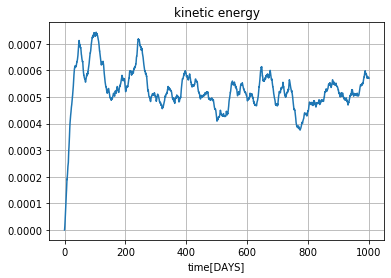

In [4]:
ax = r.stats['KINETIC_ENRG'].plot(title='kinetic energy')
ax.grid()

In [6]:
ds = r['surf']
ds['u2'] = ds.u**2
ds['v2'] = ds.v**2
ds_mean = ds.mean(dim=['x_rho','x_u','time']).persist()

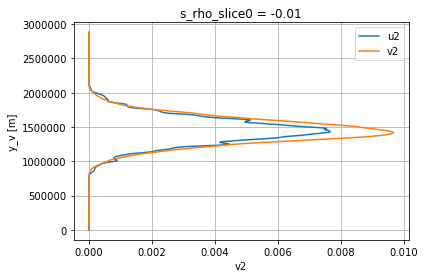

In [13]:
ax = plt.subplot(111)
ds_mean.u2.plot(y='y_rho', ax=ax, label='u2')
ds_mean.v2.plot(y='y_v', ax=ax, label='v2')
ax.legend()
ax.grid()

In [14]:
u2_meanx = (r['surf'].u**2).mean(dim=['x_u']).persist()

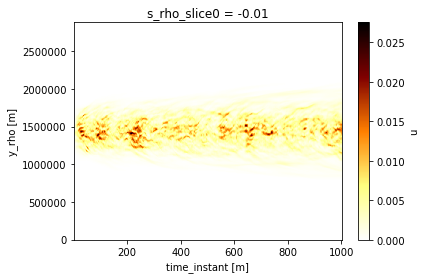

In [15]:
u2_meanx.plot(x='time', y='y_rho', cmap='afmhot_r') #.values.shape

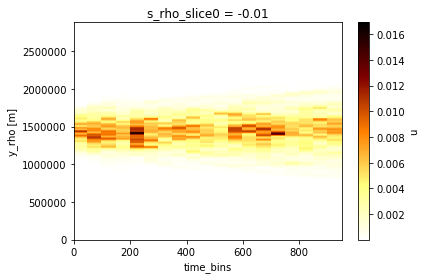

In [16]:
(u2_meanx.groupby_bins('time',np.arange(0,1000,50))
 .mean('time').plot(x='time_bins', y='y_rho', cmap='afmhot_r')
)

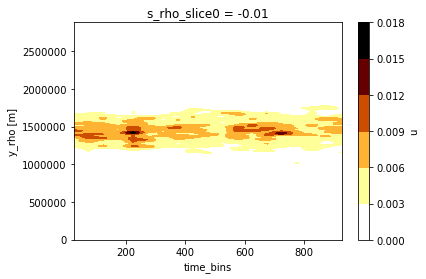

In [40]:
toplt = u2_meanx.groupby_bins('time',np.arange(0,1000,50)).mean('time').squeeze()
toplt.time_bins.values = [t.values.item().mid for t in toplt.time_bins] # contourf won't work otherwise
toplt.plot.contourf(x='time_bins', y='y_rho', cmap='afmhot_r')

--- 

## pictures

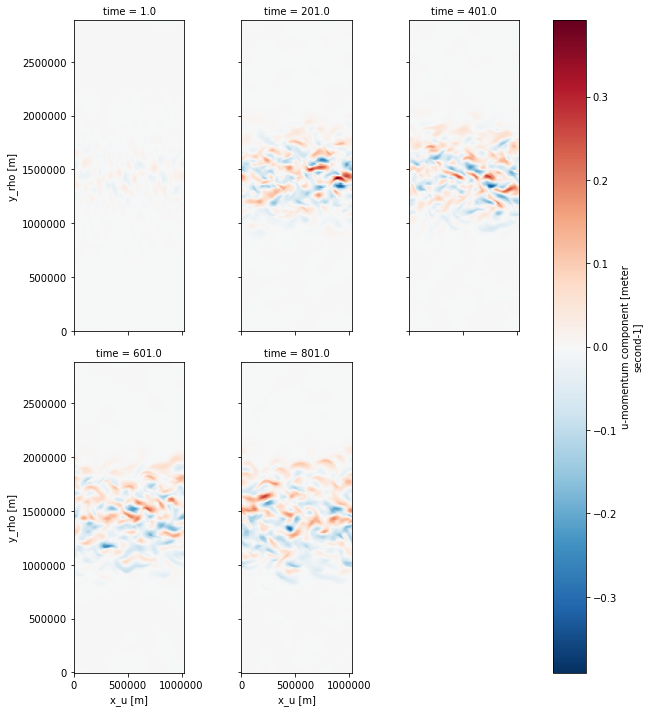

In [44]:
(r['surf']['u'].sel(time=slice(0,1000,200))
         .plot(x='x_u', y='y_rho', col='time', col_wrap=3, 
               subplot_kws={'aspect':'equal'},
               aspect=.5, figsize=(10,10))
)

---

## wavenumber spectra with xrft

---

In [ ]:
cluster.close()